In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy.stats import randint, uniform
import warnings
warnings.filterwarnings("ignore")






In [34]:
import pandas as pd

# Set option first
pd.set_option("display.max_columns", None)

# Read Excel
df = pd.read_excel(r"C:\Users\chris\Downloads\Flight_Fare.xlsx")

# Display dataframe
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [36]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [37]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [38]:
# Remove duplicate rows
df = df.drop_duplicates()

# Check shape after removing
print("Shape after removing duplicates:", df.shape)


Shape after removing duplicates: (10463, 11)


In [39]:
df.duplicated().sum()

0

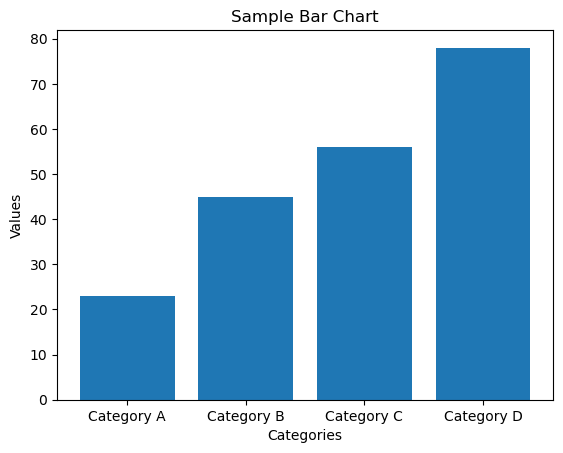

In [40]:
import matplotlib.pyplot as plt

# Sample data
categories = ['Category A', 'Category B', 'Category C', 'Category D']
values = [23, 45, 56, 78]

# Create a bar chart
plt.bar(categories, values)

# Add title and labels
plt.title('Sample Bar Chart')
plt.xlabel('Categories')
plt.ylabel('Values')

# Display the chart
plt.show()

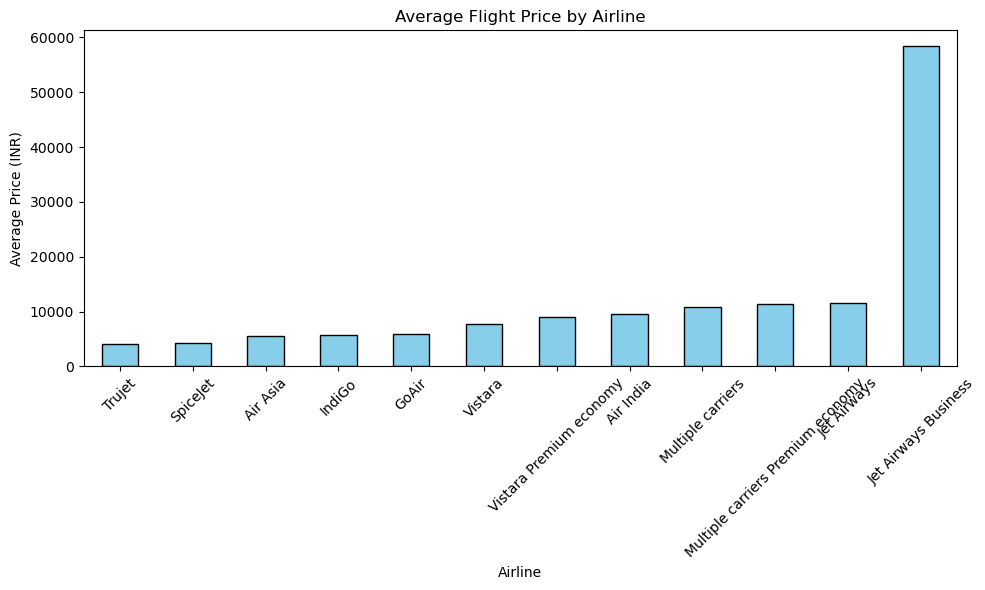

In [41]:
# Group by airline and calculate average price
avg_price_airline = df.groupby("Airline")["Price"].mean().sort_values()

# Plot
plt.figure(figsize=(10,6))
avg_price_airline.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Average Flight Price by Airline")
plt.xlabel("Airline")
plt.ylabel("Average Price (INR)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


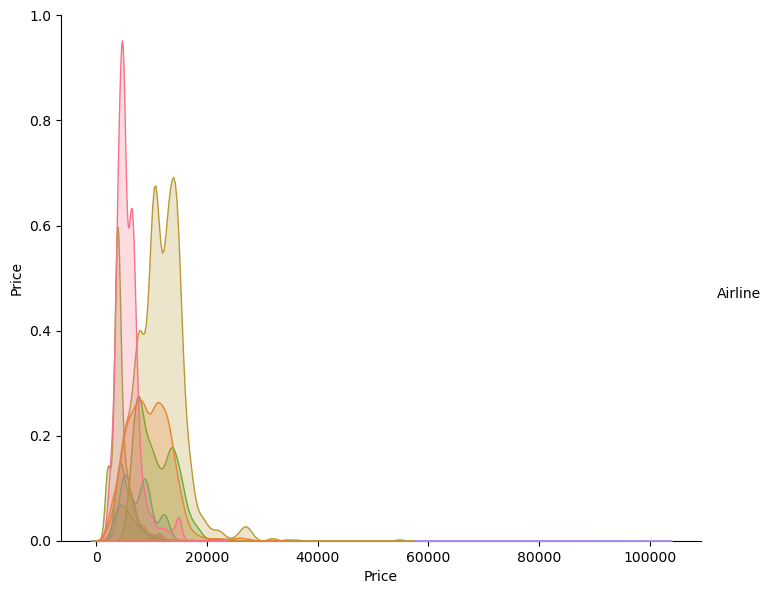

In [42]:
# Pairplot with Airline vs Price (categorical vs numeric)
sns.pairplot(df, vars=["Price"], hue="Airline", height=6, aspect=1.2)
plt.show()


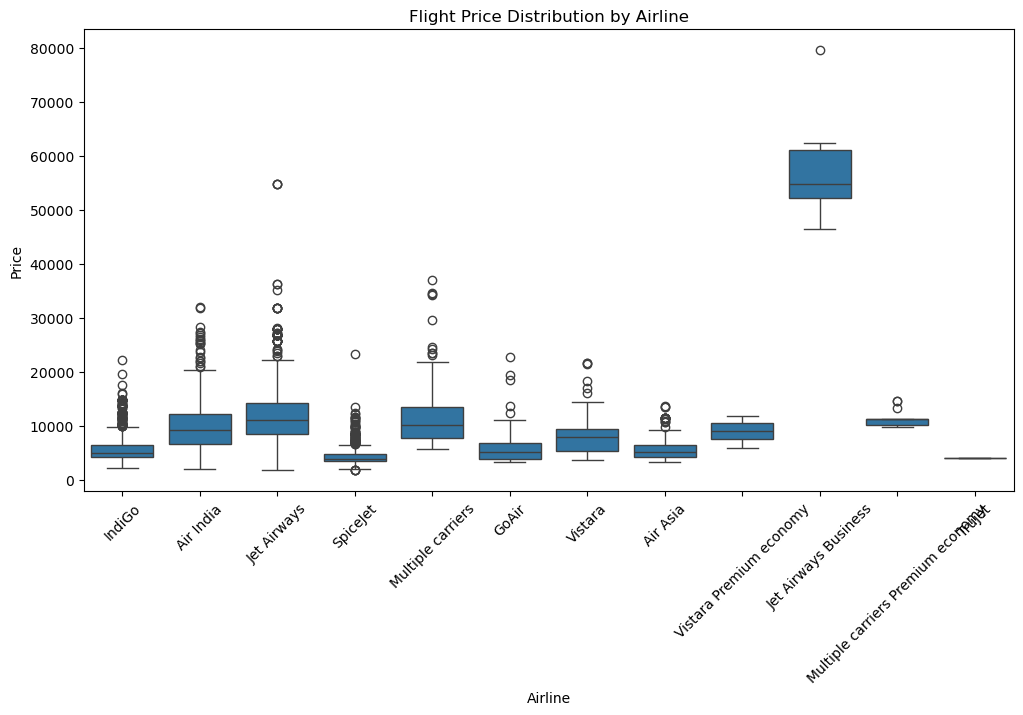

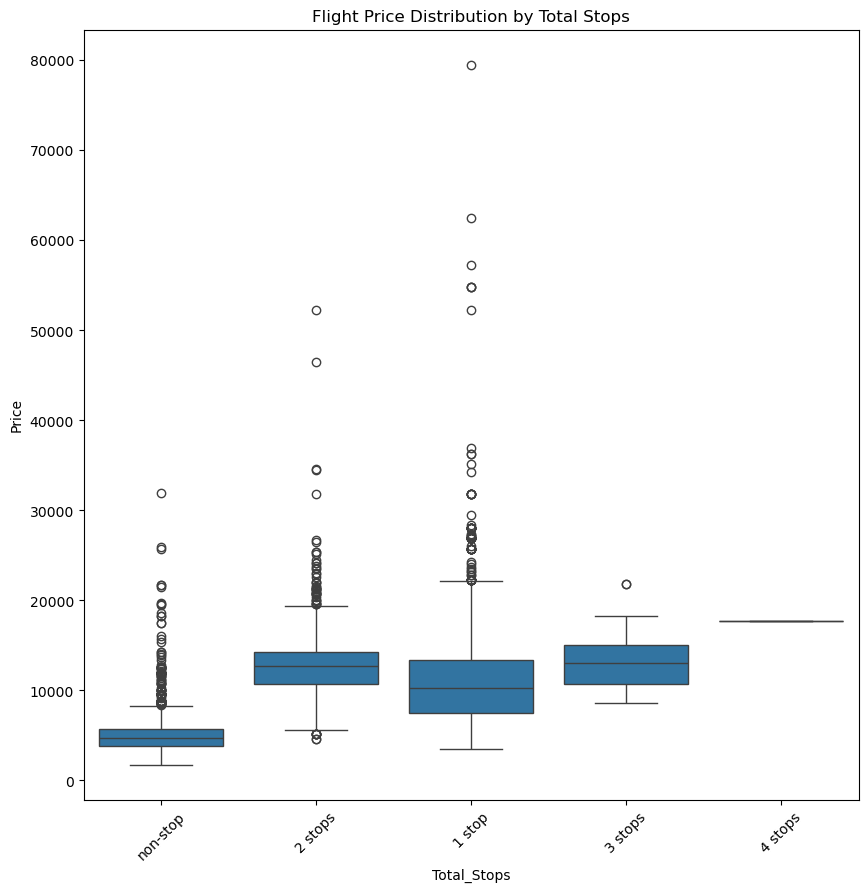

In [43]:
# Boxplot of Price by Airline
plt.figure(figsize=(12,6))
sns.boxplot(x="Airline", y="Price", data=df)
plt.title("Flight Price Distribution by Airline")
plt.xticks(rotation=45)
plt.show()

# Boxplot of Price by Total Stops
plt.figure(figsize=(10,10))
sns.boxplot(x="Total_Stops", y="Price", data=df)
plt.title("Flight Price Distribution by Total Stops")
plt.xticks(rotation=45)
plt.show()


In [44]:
# Convert Duration into minutes
def duration_to_mins(x):
    h, m = 0, 0
    if "h" in x:
        h = int(x.split("h")[0])
        if "m" in x:
            m = int(x.split("h")[1].replace("m","").strip())
    else:
        m = int(x.replace("m","").strip())
    return h*60 + m

df["Duration_mins"] = df["Duration"].apply(duration_to_mins)

In [45]:
# Extract Day & Month from Date_of_Journey
df["Journey_Day"] = pd.to_datetime(df["Date_of_Journey"], dayfirst=True).dt.day
df["Journey_Month"] = pd.to_datetime(df["Date_of_Journey"], dayfirst=True).dt.month

In [46]:
# Select numeric columns
numeric_df = df[["Price", "Duration_mins", "Journey_Day", "Journey_Month"]]

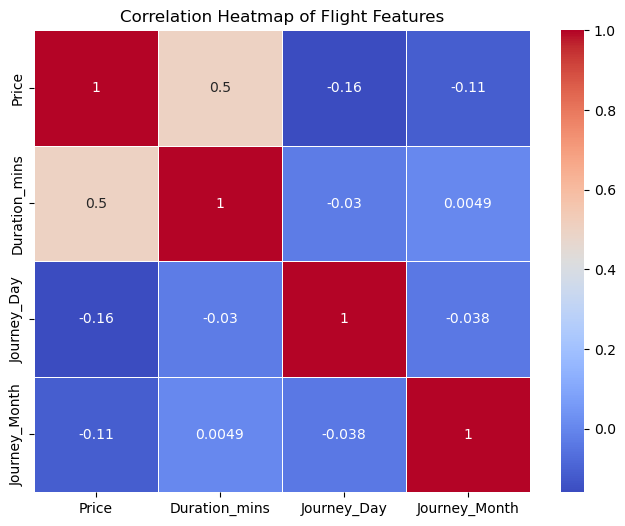

In [47]:
# ---- Heatmap ----
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Flight Features")
plt.show()

In [48]:
# Features & Target
X = df[["Airline", "Source", "Destination", "Total_Stops", "Duration_mins", "Journey_Day", "Journey_Month"]]
y = df["Price"]

In [49]:
# Define categorical and numeric features
categorical = ["Airline", "Source", "Destination", "Total_Stops"]
numeric = ["Duration_mins", "Journey_Day", "Journey_Month"]

In [50]:
 #Column Transformer (OneHotEncode categorical, pass numeric as is)
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
        ("num", "passthrough", numeric)
    ]
)

In [51]:
# Create Pipeline with Linear Regression
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

Linear Regression

Linear Regression was used as a baseline model to find the relationship between features and flight prices. It is simple, fast, and easy to interpret but couldn’t capture complex non-linear patterns, making it less accurate than advanced models like Random Forest and XGBoost.

In [52]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [53]:
# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Airline', 'Source',
                                                   'Destination',
                                                   'Total_Stops']),
                                                 ('num', 'passthrough',
                                                  ['Duration_mins',
                                                   'Journey_Day',
                                                   'Journey_Month'])])),
                ('regressor', LinearRegression())])

In [54]:
# Predictions
y_pred = model.predict(X_test)

In [55]:
# Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 1972.7912111817127
RMSE: 2886.273980384625
R2 Score: 0.6007332930650953


Random Forest

In [56]:
# Create Pipeline with Random Forest
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(
        n_estimators=200,      # number of trees
        random_state=42,
        n_jobs=-1              # use all CPU cores
    ))
])

In [57]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [58]:
# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Airline', 'Source',
                                                   'Destination',
                                                   'Total_Stops']),
                                                 ('num', 'passthrough',
                                                  ['Duration_mins',
                                                   'Journey_Day',
                                                   'Journey_Month'])])),
                ('regressor',
                 RandomForestRegressor(n_estimators=200, n_jobs=-1,
                                       random_state=42))])

In [59]:
# Predictions
y_pred = model.predict(X_test)


In [60]:
# Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 1432.4243544551198
RMSE: 2323.63767159908
R2 Score: 0.7412235165237517


Instead of using Linear Regression, the Random Forest algorithm was chosen because the linear model gave a low accuracy score and could not handle complex, non-linear relationships in the data. Random Forest provided better performance, higher R² score, and captured important patterns in flight fare prediction more effectively.

xG Boost algorithm

In [61]:
# Build pipeline with XGBoost
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", XGBRegressor(
        n_estimators=300,      # number of trees
        learning_rate=0.1,     # step size
        max_depth=7,           # depth of trees
        subsample=0.8,         # sample fraction
        colsample_bytree=0.8,  # feature fraction
        random_state=42,
        n_jobs=-1
    ))
])

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 1316.9588717530346
RMSE: 2116.7949235309943
R2 Score: 0.7852438688278198


In this project, the XGBoost Regressor was applied to predict flight ticket prices based on features such as Airline, Source, Destination, Total Stops, Journey Date, and Flight Duration. XGBoost (Extreme Gradient Boosting) is a powerful machine learning algorithm that uses an ensemble of boosted decision trees, making it highly effective for capturing complex, non-linear relationships in data.
After training and evaluation, the XGBoost model achieved the following results:
MAE (Mean Absolute Error): ~1317 INR
RMSE (Root Mean Squared Error): ~2117 INR
R² Score: ~0.785
These results indicate that the model can explain approximately 78.5% of the variance in flight ticket prices, with prediction errors averaging just around ₹1300, which is significantly better than baseline models such as Linear Regression and Random Forest.
Furthermore, the feature importance analysis revealed that factors like Airline, Total Stops, and Flight Duration play the most critical roles in determining flight fares, while features such as the month and day of journey also influence price trends.
In conclusion, XGBoost proved to be a robust and accurate model for flight fare prediction, making it a suitable choice for this dataset. Its ability to handle categorical and numerical data effectively allowed the model to outperform simpler algorithms, 
thus making it an ideal candidate for real-world applications in the travel and airline industry.

In [63]:
# Get trained XGBoost model
xgb_model = model.named_steps["regressor"]

In [64]:
# Get feature names from OneHotEncoder + numeric
ohe = model.named_steps["preprocessor"].named_transformers_["cat"]
feature_names = ohe.get_feature_names_out(categorical).tolist() + numeric


In [65]:
# Get feature importances
importances = xgb_model.feature_importances_


In [66]:
 #Create dataframe
feat_imp = pd.DataFrame({
    "Feature": feature_names,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)



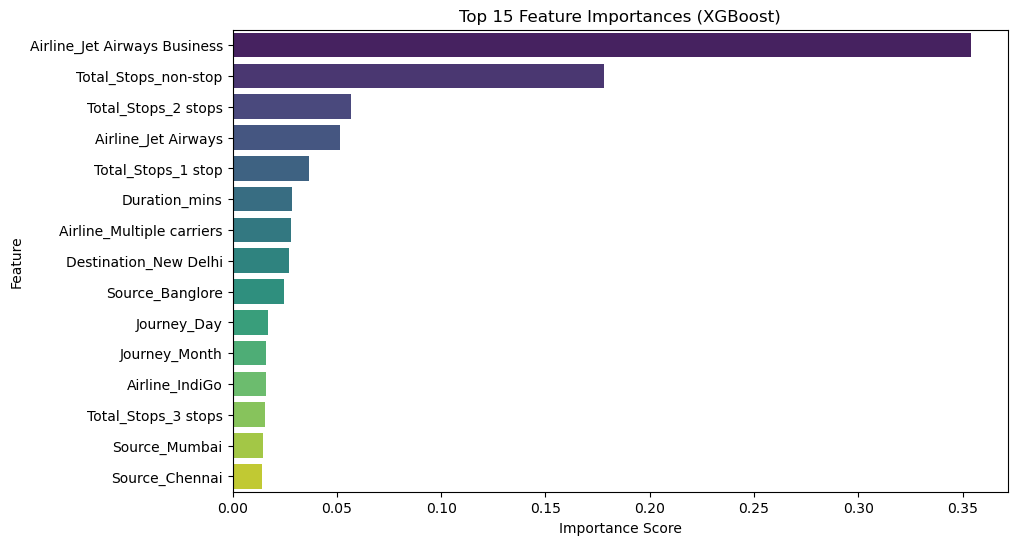

In [67]:
# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="Importance", y="Feature", data=feat_imp.head(15), palette="viridis")
plt.title("Top 15 Feature Importances (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

Hyperparameter tuning using RandomizedSearchCV was applied to find the best model parameters instead of using default ones. This improved the model’s accuracy and R² score, reduced errors, and helped the model perform better than Linear Regression and Random Forest.

In [74]:
# Convert Duration to minutes
def duration_to_mins(x):
    h, m = 0, 0
    if "h" in x:
        h = int(x.split("h")[0])
        if "m" in x:
            m = int(x.split("h")[1].replace("m","").strip())
    else:
        m = int(x.replace("m","").strip())
    return h*60 + m

df["Duration_mins"] = df["Duration"].apply(duration_to_mins)

In [87]:
# Extract Day & Month from Date_of_Journey
df["Journey_Day"] = pd.to_datetime(df["Date_of_Journey"], dayfirst=True).dt.day
df["Journey_Month"] = pd.to_datetime(df["Date_of_Journey"], dayfirst=True).dt.month

In [88]:
# Define categorical and numeric features
categorical = ["Airline", "Source", "Destination", "Total_Stops"]
numeric = ["Duration_mins", "Journey_Day", "Journey_Month"]


In [89]:
# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
        ("num", "passthrough", numeric)
    ]
)


In [90]:
# XGBoost model
xgb = XGBRegressor(objective="reg:squarederror", random_state=42)


In [91]:
# Pipeline
pipe = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", xgb)])


In [92]:
# ---- Hyperparameter Search Space ----
param_dist = {
    "regressor__n_estimators": randint(100, 500),
    "regressor__max_depth": randint(3, 10),
    "regressor__learning_rate": uniform(0.01, 0.2),
    "regressor__subsample": uniform(0.6, 0.4),
    "regressor__colsample_bytree": uniform(0.6, 0.4)
}

In [93]:
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [94]:
# ---- Randomized Search ----
random_search = RandomizedSearchCV(
    estimator=pipe,
    param_distributions=param_dist,
    n_iter=25,            # number of random combinations
    scoring="r2",
    cv=3,                 # 3-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1
)


In [95]:
# Fit the model
random_search.fit(X_train, y_train)


Fitting 3 folds for each of 25 candidates, totalling 75 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('cat',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['Airline',
                                                                                'Source',
                                                                                'Destination',
                                                                                'Total_Stops']),
                                                                              ('num',
                                                                               'passthrough',
                                                                               ['Duration_mins',
                                                                                'Journey_Day',
                                                                                'Journey_Month'])])),
                                             ('regressor',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_byl...
                                        'regressor__max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002DFB7165EE0>,
                                        'regressor__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000002DFB71A6450>,
                                        'regressor__subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000002DFB71CB860>},
                   random_state=42, scoring='r2', verbose=2)

In [85]:
# Best parameters
print("Best Parameters:", random_search.best_params_)


Best Parameters: {'regressor__colsample_bytree': 0.7599443886861021, 'regressor__learning_rate': 0.019333132642723086, 'regressor__max_depth': 6, 'regressor__n_estimators': 370, 'regressor__subsample': 0.7824279936868144}


In [86]:
# Evaluate
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\n--- Evaluation on Test Data ---")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score:", r2_score(y_test, y_pred))




--- Evaluation on Test Data ---
MAE: 1373.4044116549212
RMSE: 2041.9332361129525
R2 Score: 0.8001651763916016


Visualization – Actual vs Predicted Flight Prices

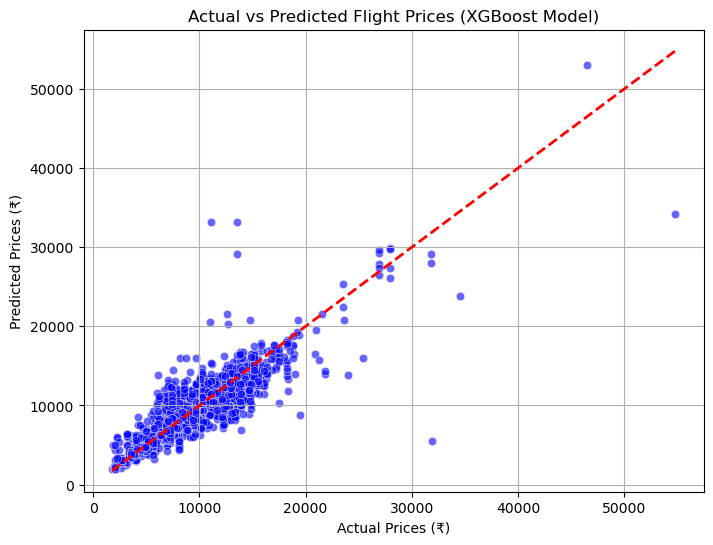

In [72]:
y_pred = model.predict(X_test)

# Scatter plot
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Perfect prediction line
plt.title("Actual vs Predicted Flight Prices (XGBoost Model)")
plt.xlabel("Actual Prices (₹)")
plt.ylabel("Predicted Prices (₹)")
plt.grid(True)
plt.show()

Difficulties Faced During the Project

Data Cleaning and Preprocessing:
The raw dataset contained missing values, duplicate entries, and inconsistent date and time formats. Handling these issues and converting journey dates and durations into a usable numerical format required significant time and attention.

Feature Engineering:
Extracting meaningful features such as Journey Day, Month, and Duration in minutes was challenging, especially when dealing with mixed data types (categorical and numerical). Ensuring proper encoding of categorical variables like Airline, Source, and Destination was also a key difficulty.

Model Selection and Optimization:
Choosing the most suitable algorithm was not straightforward. Initial models like Linear Regression and Random Forest showed moderate accuracy. After multiple trials and hyperparameter tuning, XGBoost was identified as the best-performing model, but it required tuning several parameters to achieve optimal performance.

Computational Time and Resource Constraints:
Running RandomizedSearchCV for hyperparameter tuning on large parameter grids took considerable time, especially due to the complexity of ensemble methods like Random Forest and XGBoost.

Model Evaluation and Interpretation:
Interpreting model results and analyzing feature importance to understand which variables most affected flight prices required careful visualization and analysis to ensure accurate conclusions.

Despite these challenges, each difficulty provided valuable learning experiences in data preprocessing, feature engineering, model optimization, and result interpretation. Overcoming them led to the successful creation of a reliable Flight Fare Prediction Model capable of accurately estimating flight prices using real-world data.